# 2. Library Importing

In [1]:
import numpy as np
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#config notebook
%config InlineBackend.figure_format ='retina'
pd.set_option("display.max_rows", None, "display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_data_csv(path):
  dataframe = pd.read_csv(path)
  return dataframe
df  = load_data_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/BIG%20MART%20SALES%20PREDICTION/Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'], ['LF', 'LF', 'REG', 'REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [6]:
df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7231,FDG38,8.975,REG,0.000000,Canned,84.9224,OUT018,2009,Medium,Tier 3,Supermarket Type2,1278.3360
7772,FDA03,18.500,REG,0.045534,Dairy,146.3102,OUT049,1999,Medium,Tier 1,Supermarket Type1,3645.2550
8195,DRA24,19.350,REG,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436
5456,FDY59,NaN,LF,0.031251,Baking Goods,93.3462,OUT027,1985,Medium,Tier 3,Supermarket Type3,1018.0082
1315,FDZ57,10.000,REG,0.037918,Snack Foods,129.6994,OUT018,2009,Medium,Tier 3,Supermarket Type2,1413.4934
8400,NCE07,8.180,LF,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
6935,FDM36,NaN,REG,0.102830,Baking Goods,172.6422,OUT019,1985,Small,Tier 1,Grocery Store,344.8844
4824,FDF04,17.500,LF,0.013665,Frozen Foods,257.7304,OUT045,2002,NaN,Tier 2,Supermarket Type1,5683.2688
1215,FDB14,20.250,REG,0.102704,Canned,94.3120,OUT035,2004,Small,Tier 2,Supermarket Type1,2982.7840
4522,FDW36,11.150,LF,0.057021,Baking Goods,106.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,2011.3818


In [7]:
avg =df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [13]:
df['Outlet_Size'].fillna(value = 'Medium', inplace =True)

In [48]:
df =df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

KeyError: ignored

In [15]:
df_real = pd.get_dummies(df, drop_first=True)

In [16]:
df.sample(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5382,12.857645,REG,0.000000,Breads,84.5908,1985,Medium,Tier 3,Supermarket Type3,3020.0688
6600,7.670000,LF,0.185131,Household,32.9216,1999,Medium,Tier 1,Supermarket Type1,588.5672
5467,15.500000,REG,0.156798,Snack Foods,148.6418,1987,High,Tier 3,Supermarket Type1,3972.8286
254,13.150000,REG,0.165695,Fruits and Vegetables,171.8764,2002,Medium,Tier 2,Supermarket Type1,3779.0808
6331,5.440000,LF,0.025459,Dairy,241.2538,1987,High,Tier 3,Supermarket Type1,3124.5994
8460,19.350000,REG,0.065508,Meat,168.9816,2004,Small,Tier 2,Supermarket Type1,2852.2872
6496,12.500000,LF,0.000000,Starchy Foods,127.1020,2007,Medium,Tier 2,Supermarket Type1,253.0040
1915,15.100000,LF,0.059417,Household,237.9248,1999,Medium,Tier 1,Supermarket Type1,2133.2232
5631,10.195000,LF,0.051766,Breads,34.5558,2002,Medium,Tier 2,Supermarket Type1,441.4254
1848,20.750000,LF,0.089186,Breakfast,193.3478,1987,High,Tier 3,Supermarket Type1,6006.1818


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   object  
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   object  
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Establishment_Year  8523 non-null   category
 6   Outlet_Size                8523 non-null   object  
 7   Outlet_Location_Type       8523 non-null   object  
 8   Outlet_Type                8523 non-null   object  
 9   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(5)
memory usage: 608.1+ KB


In [18]:
from sklearn.preprocessing  import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [22]:
X =df_real.drop(['Item_Outlet_Sales'], axis =1 )
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [23]:
y

array([[3735.138 ],
       [ 443.4228],
       [2097.27  ],
       ...,
       [1193.1136],
       [1845.5976],
       [ 765.67  ]])

In [24]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [25]:
X

array([[-0.84187169, -0.97073217,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.64170589, -0.90811123, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09855449, -0.95691733,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53424315, -0.59978449, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33644372,  1.53287976, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.45963367, -0.41193591, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [26]:
y

array([[ 0.910601  ],
       [-1.01844035],
       [-0.04923754],
       ...,
       [-0.57909963],
       [-0.19672492],
       [-0.82959407]])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#43

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#44

In [31]:
print(lm.intercept_)
print(lm.coef_)

[0.00160504]
[[-4.49663740e-03 -1.40502649e-02  5.71477227e-01  1.25561197e-02
  -2.74564265e-03  4.63093924e-03  3.88628707e-03 -1.42438824e-02
  -1.96456975e-03  9.21483061e-03  6.14241852e-04  1.91452099e-03
  -2.60566814e-03 -7.11145891e-05 -3.70265681e-03  1.16087060e-02
  -2.05278702e-03 -3.74701951e-03  1.72563606e-03 -1.54851217e+10
   3.57612531e+10 -1.75684897e+10  6.41689003e+10  6.63315786e+10
   3.79552525e+10  6.62374701e+10 -1.28814165e+10 -4.54061931e+10
  -8.98375065e+08 -3.30051116e+09  7.92803087e+10 -5.45483034e+10
  -9.29805281e+09 -2.22527014e+10]]


In [33]:
len(lm.coef_[0])

34

In [34]:
predicted =  sc_y.inverse_transform(lm.predict(X_test))
predicted

array([[1361.50678967],
       [ 707.79728984],
       [ 877.91062972],
       ...,
       [ 849.79003246],
       [ 567.56859394],
       [1704.86448963]])

In [36]:
y_real = sc_y.inverse_transform(y_test)

#45

In [37]:
from sklearn import metrics

In [38]:
MAE = metrics.mean_absolute_error(y_real, predicted)
MSE = metrics.mean_squared_error(y_real, predicted)
RMSE = np.sqrt(metrics.mean_squared_error(y_real, predicted))
R2 = metrics.r2_score(y_real, predicted)
print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)
print('R2', R2 )

MAE 792.0701534489219
MSE 1143548.4849433983
RMSE 1069.3682644175478
R2 0.5792637678431589


#46

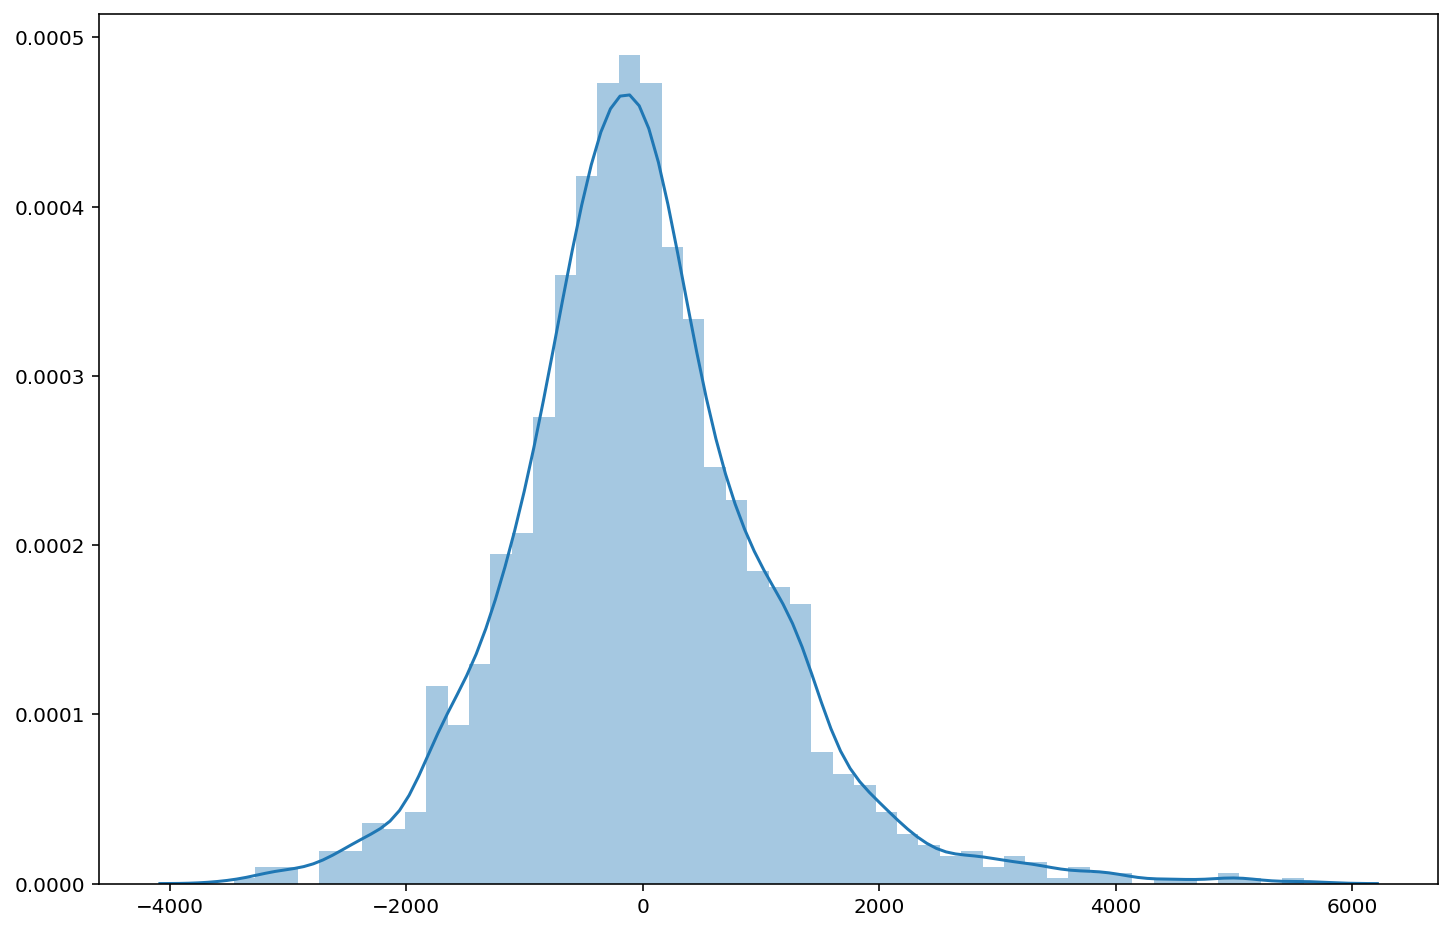

In [39]:
fig = plt.figure(figsize=(12, 8))
sns.distplot((y_real- predicted), bins=50)

#47

In [43]:
dict_compare = {'Sales' : y_real.flatten(), 'Predicted' : predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,1361.506790
1,356.8688,707.797290
2,377.5086,877.910630
3,5778.4782,4230.204783
4,2356.9320,3348.057741
5,865.5400,638.494989
6,4613.9940,4754.107132
7,2410.8618,2048.651810
8,1948.1308,1393.845477
9,1937.4780,2786.947676


#48

In [47]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.761382
Predicted,0.761382,1.000000


In [46]:
##linear regression not need to standardization scalaler

# 49

In [51]:
def load_data_csv(path):
  dataframe = pd.read_csv(path)
  return dataframe
df  = load_data_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/BIG%20MART%20SALES%20PREDICTION/Train.csv')

In [52]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'], ['LF', 'LF', 'REG', 'REG'])

In [53]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [54]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [55]:
avg =df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [56]:
df['Outlet_Size'].fillna(value = 'Medium', inplace =True)

In [57]:
df =df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [58]:
df_real = pd.get_dummies(df, drop_first=True)

In [59]:
from sklearn.preprocessing  import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [60]:
X =df_real.drop(['Item_Outlet_Sales'], axis =1 )
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [61]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [65]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [66]:
predicted = sc_y.inverse_transform(svr_regressor.predict(X_test))

In [67]:
predicted

array([1127.70636684,  844.9266895 ,  478.13445494, ...,  453.82581464,
        853.45302587, 1575.60575842])

In [68]:
y_real = sc_y.inverse_transform(y_test)

# 50

In [69]:
from sklearn import metrics

In [70]:
MAE = metrics.mean_absolute_error(y_real, predicted)
MSE = metrics.mean_squared_error(y_real, predicted)
RMSE = np.sqrt(metrics.mean_squared_error(y_real, predicted))
R2 = metrics.r2_score(y_real, predicted)
print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)
print('R2', R2 )

MAE 728.7202764161343
MSE 1077397.3586280807
RMSE 1037.9775328146948
R2 0.6036021986183224


# 51

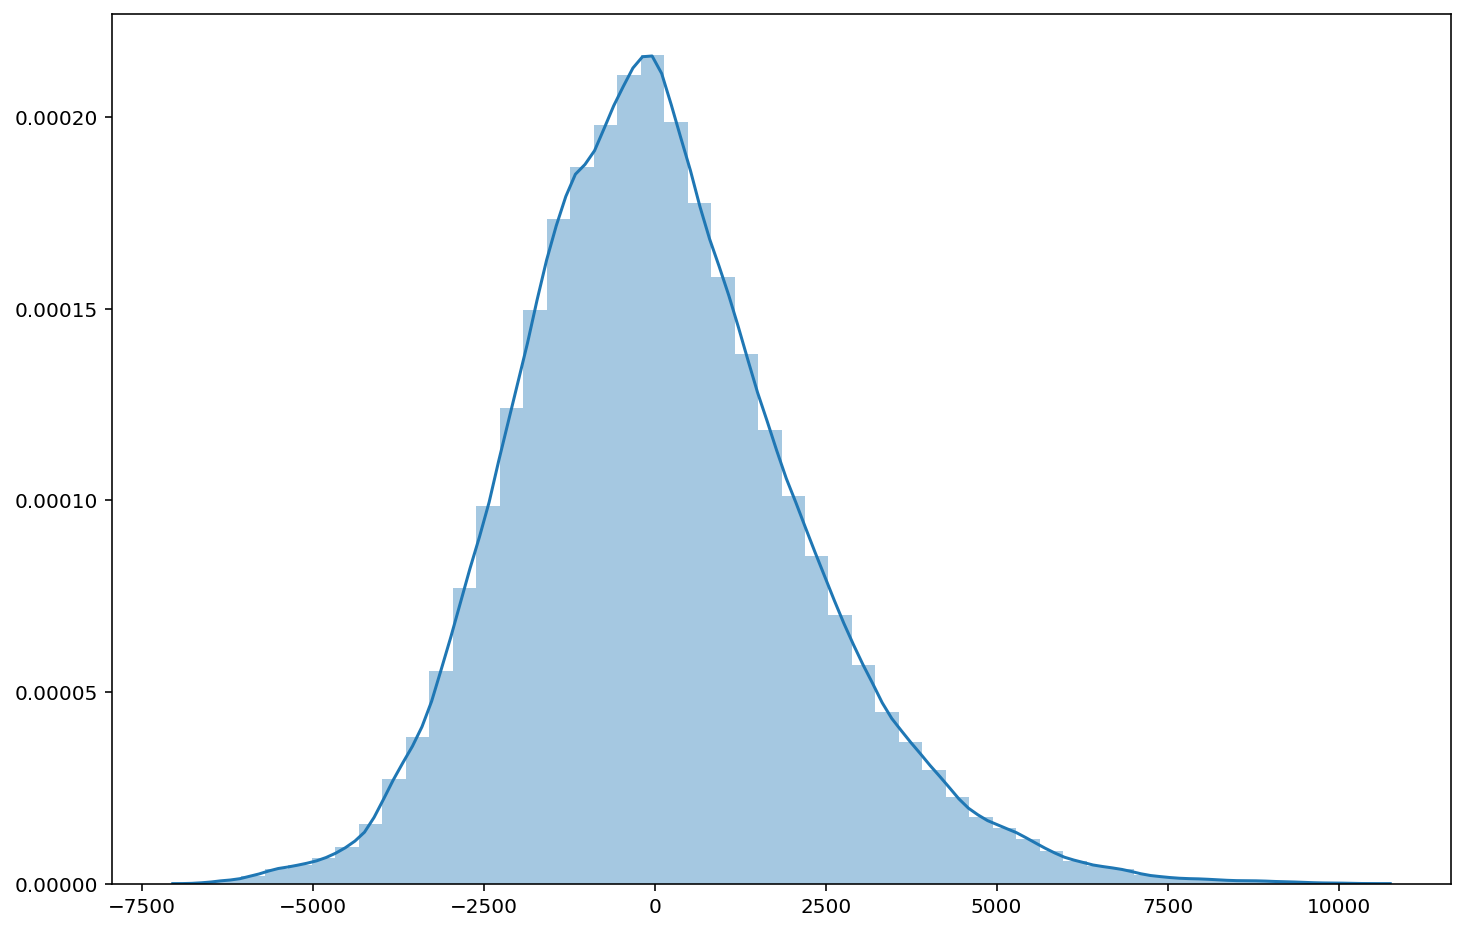

In [71]:
fig = plt.figure(figsize=(12, 8))
sns.distplot((y_real- predicted), bins=50)

# 52

In [72]:
dict_compare = {'Sales' : y_real.flatten(), 'Predicted' : predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,1127.706367
1,356.8688,844.926690
2,377.5086,478.134455
3,5778.4782,4575.883525
4,2356.9320,3183.447863
5,865.5400,655.353028
6,4613.9940,5234.688704
7,2410.8618,1743.496689
8,1948.1308,1311.365100
9,1937.4780,2439.977798


#53

In [73]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.777856
Predicted,0.777856,1.000000
